# 📝 Exercise M6.04

The aim of the exercise is to get familiar with the histogram
gradient-boosting in scikit-learn. Besides, we will use this model within
a cross-validation framework in order to inspect internal parameters found
via grid-search.

We will use the California housing dataset.

In [1]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

First, create a histogram gradient boosting regressor. You can set the
trees number to be large, and configure the model to use early-stopping.

In [8]:
from sklearn.ensemble import HistGradientBoostingRegressor

hist_model = HistGradientBoostingRegressor(max_iter=1000, early_stopping=True)

We will use a grid-search to find some optimal parameter for this model.
In this grid-search, you should search for the following parameters:

* `max_depth: [3, 8]`;
* `max_leaf_nodes: [15, 31]`;
* `learning_rate: [0.1, 1]`.

Feel free to explore the space with additional values. Create the
grid-search providing the previous gradient boosting instance as the model.

In [14]:
from sklearn.model_selection import GridSearchCV

max_depth_params =  [3, 8]
max_leaf_nodes_params =  [15, 31]
learning_rate_params =  [0.1, 1]

param_grid ={"max_depth" :  [3, 8],
"max_leaf_nodes" :  [15, 31],
"learning_rate" :  [0.1, 1]
}

grid_model = GridSearchCV(hist_model, param_grid=param_grid, n_jobs=-1)

Finally, we will run our experiment through cross-validation. In this regard,
define a 5-fold cross-validation. Besides, be sure to shuffle the data.
Subsequently, use the function `sklearn.model_selection.cross_validate`
to run the cross-validation. You should also set `return_estimator=True`,
so that we can investigate the inner model trained via cross-validation.

In [15]:
from sklearn.model_selection import cross_validate, KFold

cv = KFold(n_splits=5, shuffle=True)

cv_results = cross_validate(grid_model, data, target, cv=cv, return_estimator=True, n_jobs=-1)

Now that we got the cross-validation results, print out the mean and
standard deviation score.

In [23]:
print(f"mean score: {cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}")

mean score: 0.704 +/- 0.017


Then inspect the `estimator` entry of the results and check the best
parameters values. Besides, check the number of trees used by the model.

In [52]:
for estimator in cv_results["estimator"]:
    print(estimator.best_params_)
    print(f"# trees: {estimator.best_estimator_.n_iter_}")

{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 31}
# trees: 637
{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 15}
# trees: 494
{'learning_rate': 0.1, 'max_depth': 8, 'max_leaf_nodes': 31}
# trees: 240
{'learning_rate': 0.1, 'max_depth': 8, 'max_leaf_nodes': 15}
# trees: 356
{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 15}
# trees: 407


Inspect the results of the inner CV for each estimator of the outer CV.
Aggregate the mean test score for each parameter combination and make a box
plot of these scores.

In [152]:
import pandas as pd
mean_scores=[]
std_scores =[]
full_df = pd.DataFrame()
for idx, estimator in enumerate(cv_results['estimator']):
    param_names = estimator.cv_results_['params']
    df = pd.DataFrame(param_names, estimator.cv_results_['mean_test_score']).reset_index().set_index(list(param_names[0].keys()), drop=True)
    df.columns = [f"cv{idx}"]
    df=df.T
    full_df = pd.concat([full_df,df])
    

<AxesSubplot:>

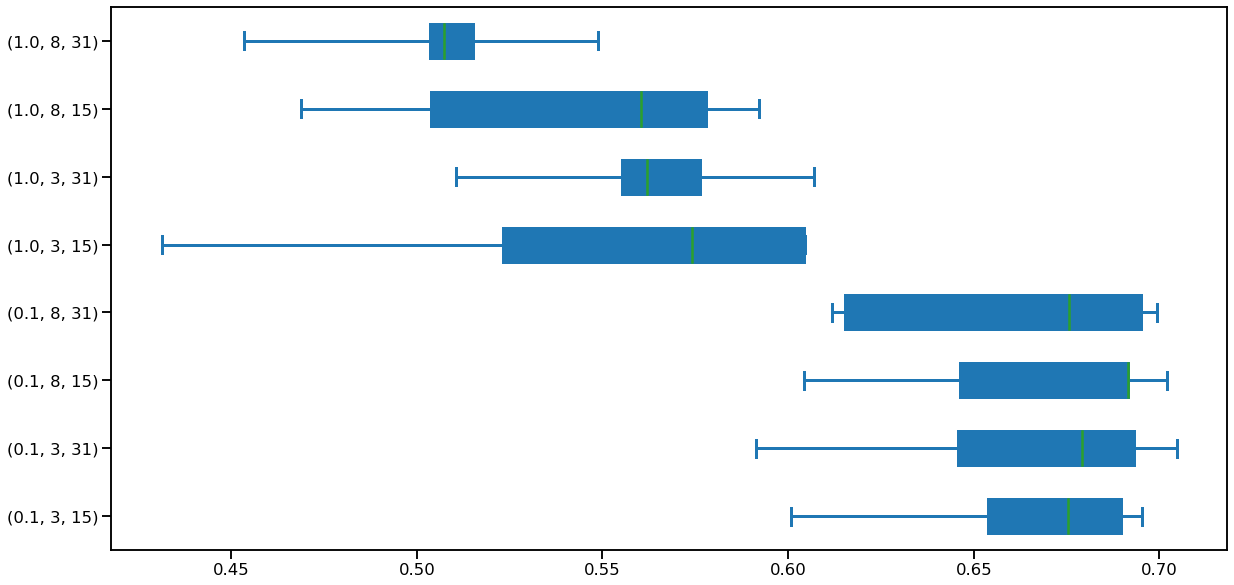

In [157]:
full_df.plot.box(figsize=(20,10), vert=False)